<a href="https://colab.research.google.com/github/FelipeSotoG/Desafio4/blob/main/Desafio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se cambio "games.csv" a "Input.csv" para su proceso

**texto en negrita**# Aprendamos a usar Keras

> Bloc con sangría


Keras es una librería para python que nos permite crear redes neuronales de manera rápida y eficiente. De esta manera nos evitamos las implementaciones de componentes más complejos y nos podemos concentrar en encontrar los parámetros apropiados para nuestra tarea de predicción. 

Esta vez haremos una tarea de clasificación, específicamente del dataset de predicción del ganador en una ranked de lol.

<p align=center>
  <img src="https://1000marcas.net/wp-content/uploads/2020/11/League-of-Legends-Logo-2009.jpg" height="200">
</p>

Primero se deben importar las librerías necesarias. Utilizaremos Keras para la creación de la red neuronal, Pandas para leer nuestro csv con los datos de enrtenamiento y algunas funciones de sklearn para procesar estos datos.

In [ ]:
import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

Con pd.read_csv() podemos leer un csv a partir de un archivo local o una url.

In [ ]:
dataset = 'Input.csv'
df = pd.read_csv(dataset)
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0.0,0.0,1.0,1.0,114.0,67.0,43.0,16.0,51.0
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0.0,0.0,0.0,0.0,11.0,67.0,238.0,51.0,420.0
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0.0,0.0,1.0,0.0,157.0,238.0,121.0,57.0,28.0
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0.0,0.0,0.0,0.0,164.0,18.0,141.0,40.0,51.0
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0.0,0.0,1.0,0.0,86.0,11.0,201.0,122.0,18.0


In [ ]:
df=pd.read_csv("Input.csv",index_col="gameId")
df=df[:500]
Y=df["winner"]
Y[Y==1]=0
Y[Y==2]=1
X=df.drop(["winner","seasonId"],axis=1)
X = (X-X.mean())/X.std()
p=60

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Finalmente, hay que dividir los datos en Train y Test. Durante el 

---

entrenamiento, la red sólo verá los primeros datos, esto es para asegurarse que no esté memorizando solamente. Usualmente la proporción para dividir estos datos es 70/30, siendo mayor la cantidad de datos para entrenamiento.

In [ ]:
# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=2)
print(X_train)
print(Y_train)

            creationTime  gameDuration  firstBlood  firstTower  \
gameId                                                           
3246799766     -2.204339     -3.253116   -0.956032   -2.704363   
3326699508      0.677362     -0.241201   -0.956032   -0.841854   
3290591993     -0.630318      0.053892    1.027437    1.020655   
3330134561      0.793731     -0.445799    1.027437   -0.841854   
3268995334     -1.419073      0.543746   -0.956032   -0.841854   
...                  ...           ...         ...         ...   
3289287394     -0.677192     -0.658266   -0.956032    1.020655   
3287517913     -0.737630     -0.502850    1.027437   -0.841854   
3331381617      0.839226      0.451284   -0.956032    1.020655   
3322311228      0.493960     -0.253005    1.027437   -0.841854   
3326688250      0.676595      1.047371    1.027437    1.020655   

            firstInhibitor  firstBaron  firstDragon  firstRiftHerald  \
gameId                                                               

In [ ]:
print(Y_train.value_counts())

1    180
0    170
Name: winner, dtype: int64


Con los datos ya procesados y divididos en set de entrenamiento y test, ya podemos crear la red. Gracias a keras, este proceso es muy simple!

Relu + Sigmoid

In [ ]:
from keras.engine import input_spec
from keras.models import Sequential
from keras.layers import Dense

modelo = Sequential()
modelo.add(Dense(4, input_dim=58, activation="relu"))
modelo.add(Dense(10, activation="relu"))
modelo.add(Dense(4, activation="relu"))
modelo.add(Dense(1, activation="sigmoid"))

modelo.compile(loss='mse', optimizer='adam')


Sigmoid

In [ ]:
from keras.engine import input_spec
from keras.models import Sequential
from keras.layers import Dense

modelo = Sequential()
modelo.add(Dense(4, input_dim=58, activation="sigmoid"))
modelo.add(Dense(10, activation="sigmoid"))
modelo.add(Dense(4, activation="sigmoid"))
modelo.add(Dense(1, activation="sigmoid"))

modelo.compile(loss='mse', optimizer='adam')


El código anterior definió una red neuronal, con una capa de entrada de 4 neuronas, 3 capas ocultas de 8 neuronas cada una y una capa de salida con 3 neuronas correspondientes a las clases. La última capa realiza una función de activación *softmax*, que permite transformar las salidas de las neuronas en una probabilidad, de modo que la neurona con el valor más alto será la seleccionada.

Finalmente, el modelo se optimizará con una función de pérdida del error cuadrático medio y con un optimizador *adam*, por 150 epocas.

In [ ]:
history = modelo.fit(X_train, Y_train, epochs=50, batch_size=10, validation_split=0.1)

Epoch 1/50
32/32 [==============================] - 1s 6ms/step - loss: 0.3201 - val_loss: 0.2803
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.3023 - val_loss: 0.2679
Epoch 3/50
32/32 [==============================] - 0s 3ms/step - loss: 0.2868 - val_loss: 0.2579
Epoch 4/50
32/32 [==============================] - 0s 3ms/step - loss: 0.2734 - val_loss: 0.2506
Epoch 5/50
32/32 [==============================] - 0s 3ms/step - loss: 0.2634 - val_loss: 0.2453
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2553 - val_loss: 0.2419
Epoch 7/50
32/32 [==============================] - 0s 3ms/step - loss: 0.2493 - val_loss: 0.2393
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.2445 - val_loss: 0.2369
Epoch 9/50
32/32 [==============================] - 0s 3ms/step - loss: 0.2402 - val_loss: 0.2344
Epoch 10/50
32/32 [==============================] - 0s 3ms/step - loss: 0.2360 - val_loss: 0.2314
Epoch 11/50
32/32 [

In [ ]:
history = modelo.fit(X_train, Y_train, epochs=50, batch_size=10)

Epoch 1/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2585
Epoch 2/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2549
Epoch 3/50
35/35 [==============================] - 0s 1ms/step - loss: 0.2518
Epoch 4/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2494
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2469
Epoch 6/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2447
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 0.2421
Epoch 8/50
35/35 [==============================] - 0s 1ms/step - loss: 0.2392
Epoch 9/50
35/35 [==============================] - 0s 1ms/step - loss: 0.2357
Epoch 10/50
35/35 [==============================] - 0s 2ms/step - loss: 0.2314
Epoch 11/50
35/35 [==============================] - 0s 1ms/step - loss: 0.2258
Epoch 12/50
35/35 [==============================] - 0s 1ms/step - loss: 0.2192
Epoch 13/50
35/35 [==============================

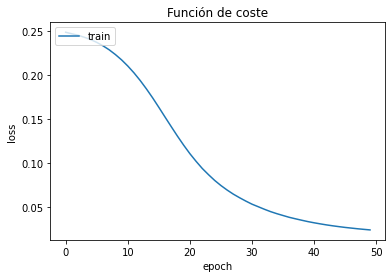

In [ ]:
plt.plot(history.history['loss'])
plt.title('Función de coste')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Podemos ver como efectivamente, durante el entrenamiento, la función de coste nos indicó que el modelo va mejorando en sus predicciones.

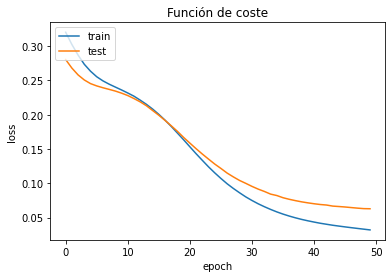

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Función de coste')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Ahora, finalmente podemos realizar métricas de rendimiento del modelo cuando este predice los datos de Test. Para la tarea de clasificación, podemos utilizar la presición, recall o el f1-score. Todas estas métricas se basan en los errores tipo 1 (Falso positivo) y tipo 2(Falso negativo).

<p align="center">
<img src="https://www.researchgate.net/profile/Sebastian-Bittrich/publication/330174519/figure/fig1/AS:711883078258689@1546737560677/Confusion-matrix-Exemplified-CM-with-the-formulas-of-precision-PR-recall-RE.png" height="220">
</p>

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix, precision_score
Y_pred = modelo.predict(X_test)
Y_pred[Y_pred<=0.5]=0
Y_pred[Y_pred>0.5]=1
Y_exp = Y_test
print(accuracy_score(Y_exp, Y_pred))
print(classification_report(Y_exp, Y_pred))

0.9266666666666666
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        78
           1       0.90      0.96      0.93        72

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150



Ahora prueben cambiando la arquitectura de la red o el dataset y su procesamiento.

# Net from scratch

##Data

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv("Input.csv")
df=df[:500]

In [ ]:
print(df.shape)

(500, 61)


In [ ]:
df.head()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
0,3326086514,1504279457970,1949,9,1,2,1,1,1,1,...,5,0,0,1,1,114,67,43,16,51
1,3229566029,1497848803862,1851,9,1,1,1,1,0,1,...,2,0,0,0,0,11,67,238,51,420
2,3327363504,1504360103310,1493,9,1,2,1,1,1,2,...,2,0,0,1,0,157,238,121,57,28
3,3326856598,1504348503996,1758,9,1,1,1,1,1,1,...,0,0,0,0,0,164,18,141,40,51
4,3330080762,1504554410899,2094,9,1,2,1,1,1,1,...,3,0,0,1,0,86,11,201,122,18


In [ ]:
Y=pd.DataFrame(df["winner"])
Y.columns=[0]
Y[Y==1]=0
Y[Y==2]=1
X=df.drop(["winner","seasonId","creationTime","gameId"],axis=1)
X = (X-X.mean())/X.std()
p=57
print(Y)

     0
0    0
1    0
2    0
3    0
4    0
..  ..
495  1
496  0
497  0
498  0
499  0

[500 rows x 1 columns]


## Backpropagation
El backpropagation es el mecanismo por el cual la red neuronal aprende. Debido a que se entrena mediante ejemplos, va corrigiendo sus pesos a través de la medición del error en sus predicciones.

## Previo: cambiemos de representación

En el taller anterior vimos como programar una red neuronal utilizando un grafo, con nodos que contenían listas de nodos para la capa anterior a la que estaban, y podían ir pidiendo hacia atrás el valor esperado. Esta representación, si bien es correcta, es ineficiente ya que para manejar un numero más grande de valores de entrada y neuronas ocultas o de salida, la cantidad de parámetros escala de manera abismal.

Para solventar esta problemática es que vamos a cambiar la forma en la que representamos los grafos, utilizando una **matriz de adyacencia**. Esto es una matriz que representa cuando dos nodos dentro de un grafo están conectados, e incluso pueden incluirse los pesos asociados a dicha conexión.

<p algign="center">
<img src="https://i.ibb.co/yW8q85C/image.png">
</p>


In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

Para optimizar un poco el código, ahora la función de activación retornará su valor activado y el valor derivado a la vez.

sigmoid

In [ ]:
def activation(x):
  return ((1/(1+np.e**(-x))) , (x * (1-x)))

Crearemos la capa, que ahora solamente tendrá una referencia a su función de activación y los pesos asociados a la conexión con la capa anterior.

In [ ]:
class Capa():
  def __init__(self, n_conexiones: int, n_neuronas: int, activation):
    self.activation = activation
    self.W = np.random.rand(n_conexiones, n_neuronas) * 2 - 1
    
    

In [ ]:


def forward(red, X):
  out = [(None, X)]
  for l, capa in enumerate(red):
    z = out[-1][1] @ red[l].W # Multiplicación de matrices
    a = red[l].activation(z)[0]
    out.append((z, a)) # Guardamos todas las combinaciones para poder usar la misma función en el backpropagation
  return out

#print(coste(forward(red, X)[-1][1], Y)[0]) # el valor [1] del último output se compara con el valor esperado, la función de coste también retorna el valor real y el derivado




La función de coste se hará igual que la de activación, así que retornaremos el valor normal y el de la derivada del error cuadrático medio.

coste 1

In [ ]:
def coste(Ypred, Yesp):
  return (np.mean((Ypred - Yesp) ** 2), (Ypred - Yesp))

Desde este punto esta el full sigmoid y el relu+ sigmoid, lo separamos aqui porque desde ahora se diferencian las funciones.

### Full sigmoid

In [ ]:
def crear_red(topologia: list, activation):
  red = []
  #for i in range(len(topologia) - 1):
  for l, capa in enumerate(topologia[:-1]):
    red.append( Capa(topologia[l], topologia[l+1], activation) )
  return red

Para realizar una predicción, ahora se harán 2 pasos por cada capa: 
1. Se calculan la suma ponderada (z)
2. Se pasa el valor por la función de activación (a)

Para usarlo en la fase de entrenamiento, guardaremos ambos valores de cada capa en una lista y la retornaremos.

Luego si queremos una predicción, debemos acceder al segundo valor de la última tupla de la lista que retorna su llamado.

In [ ]:
topologia = [p, 2, 4, 4, 2, 1]
red = crear_red(topologia, activation)
prediccion = forward(red, X)

# La predicción de todos los valores de entrada de X
print(prediccion[-1][1])

            0
0    0.594640
1    0.597757
2    0.597840
3    0.597940
4    0.597903
..        ...
495  0.595132
496  0.595036
497  0.594830
498  0.595138
499  0.597602

[500 rows x 1 columns]


Finalmente queda el entrenamiento. Esta es la parte más complicada de la implementación, ya que debe iterativamente calcular el gradiente de cada capa y actualizarlos luego.

Para recordar, en cada capa, el gradiente sería la múltiplicación de su valor de salida con un delta, que define una métrica del error de este resultado. Se tienen 2 casos distintos para esta, los cuales son:

1. Para la última capa (la de salida), el delta se calcula mediante
\begin{equation}
  \delta_i = (f(x_i) - Y_{esperado}) \cdot f'(x_i)
\end{equation}
2. Para las capas anteriores, el delta es igual a
\begin{equation}
  \delta_i = (\sum_{i \epsilon I} \delta_i \cdot w_{ij})  \cdot f'(x_i)
\end{equation}

Con $I$ siendo las neuronas de la capa siguiente a esta.

Finalmente, la modificación del gradiente está dada por

\begin{equation}
  W_{ij} = W_{ij} - (f(x_j) \times \delta_i) \cdot T_{learn}
\end{equation}



In [ ]:
def train(red, X, Y, coste, learning_rate=0.001):
  # forward 
  
  out = forward(red, X)

  # backward pass
  delta = []
  #for i in range(len(red)-1, -1, -1): # recorrer hacie atrás del largo a 0
  for i in reversed(range(0,len(red))):
    z = out[i+1][0]
    a = out[i+1][1]
    if i == len(red)-1:
        #delta última capa
        delta.insert(0, coste(a, Y)[1] * red[i].activation(a)[1] ) # delta 0 = derivada del coste (osea Ypred - Yesp) * derivada de activación de la capa
    else:
        # delta respecto al anterior
        delta.insert(0, delta[0] @ aux_W.T * red[i].activation(a)[1]) # delta n = delta(n+1) x W(n+1).T * derivada de activación de la capa 
    aux_W = red[i].W
    # Descenso del gradiente
    red[i].W = red[i].W - out[i][1].T @ delta[0] * learning_rate # nuevoW[i] = actualW[i] - salida[i].T x delta * learning_rate

  return (out[-1][1],red)

Coste iteración 0: 0    0.270494
dtype: float64
Coste iteración 25: 0    0.049476
dtype: float64
Coste iteración 50: 0    0.010205
dtype: float64
Coste iteración 75: 0    0.00708
dtype: float64


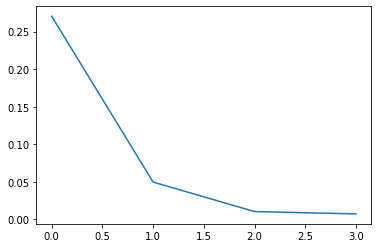

In [ ]:
import time 
from IPython.display import clear_output
topologia = [p, 4 , 10 ,4 , 1]
red = crear_red(topologia, activation)
loss = []

for i in range(100):
  pY,red = train(red, X, Y, coste, learning_rate=0.1)
  if i % 25 == 0:
    costo = coste(pY, Y)[0]
    print(f'Coste iteración {i}: {costo}')
    loss.append(costo)
    

    
plt.plot(range(len(loss)), loss)
plt.show()

Finalmente podemos ver el entrenamiento en acción si vamos guardando los costes de la función mediante el entrenamiento. Tengan en cuenta que la función *train* sólo hace una instancia del descenso del gradiente, y queremos repetir varias veces el entrenamiento, hasta que sea lo suficientemente bajo o hasta que no hayan cambios significativos del coste entre entrenamientos.

In [ ]:
df=pd.read_csv("Input.csv")
df=df[500:700]
Y=pd.DataFrame(df["winner"])
Y.columns=[0]
Y[Y==1]=0
Y[Y==2]=1
X=df.drop(["winner","seasonId","creationTime","gameId"],axis=1)
X = (X-X.mean())/X.std()

In [ ]:
resultado = forward(red,X)
print(resultado[-1][1])
print(coste(resultado[-1][1], Y)[1])
print(coste(resultado[-1][1], Y)[0])

            0
500  0.001978
501  0.985827
502  0.985780
503  0.655007
504  0.002083
..        ...
695  0.898746
696  0.987967
697  0.742969
698  0.003266
699  0.981276

[200 rows x 1 columns]
            0
500  0.001978
501 -0.014173
502 -0.014220
503  0.655007
504  0.002083
..        ...
695 -0.101254
696 -0.012033
697 -0.257031
698 -0.996734
699 -0.018724

[200 rows x 1 columns]
0    0.08014
dtype: float64


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix, precision_score
Y_pred = forward(red,X)[-1][1]
Y_pred[Y_pred<=0.5]=0
Y_pred[Y_pred>0.5]=1
Y_exp = Y
print(accuracy_score(Y_exp, Y_pred))
print(classification_report(Y_exp, Y_pred))

0.91
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        97
           1       0.90      0.92      0.91       103

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



### Relu + Sigmoid

sigmoid

In [ ]:
def activation(x):
  return ((1/(1+np.e**(-x))) , (x * (1-x)))

relu

In [ ]:
def relu_prime(z): 
  z[z<0]=0
  z[z>0]=1
  return z

In [ ]:
def activation2(x):
  return ((np.maximum(0, x)), (relu_prime(x)))

Ahora para la red, sólo tendremos un arreglo de capas, y el constructor las creará a partir de una lista como la del taller anterior.

In [ ]:
def crear_red(topologia: list, activation,activation2):
  red = []
  #for i in range(len(topologia) - 1):
  for l, capa in enumerate(topologia[:-1]):
    if(len(red)-1==l):
      red.append( Capa(topologia[l], topologia[l+1], activation) )
    else:
      red.append( Capa(topologia[l], topologia[l+1], activation2) )
  return red



In [ ]:
topologia = [p, 4, 8, 4, 1]
red = crear_red(topologia, activation,activation2)
prediccion = forward(red, X)

# La predicción de todos los valores de entrada de X
print(prediccion[-1][1])

            0
500  0.427449
501  1.080882
502  0.000000
503  0.669711
504  2.629800
..        ...
695  0.235855
696  0.905656
697  0.000000
698  2.432473
699  0.502437

[200 rows x 1 columns]


Finalmente queda el entrenamiento. Esta es la parte más complicada de la implementación, ya que debe iterativamente calcular el gradiente de cada capa y actualizarlos luego.

Para recordar, en cada capa, el gradiente sería la múltiplicación de su valor de salida con un delta, que define una métrica del error de este resultado. Se tienen 2 casos distintos para esta, los cuales son:

1. Para la última capa (la de salida), el delta se calcula mediante
\begin{equation}
  \delta_i = (f(x_i) - Y_{esperado}) \cdot f'(x_i)
\end{equation}
2. Para las capas anteriores, el delta es igual a
\begin{equation}
  \delta_i = (\sum_{i \epsilon I} \delta_i \cdot w_{ij})  \cdot f'(x_i)
\end{equation}

Con $I$ siendo las neuronas de la capa siguiente a esta.

Finalmente, la modificación del gradiente está dada por

\begin{equation}
  W_{ij} = W_{ij} - (f(x_j) \times \delta_i) \cdot T_{learn}
\end{equation}



In [ ]:
def train(red, X, Y, coste, learning_rate=0.001):
  # forward 
  out = forward(red, X)

  # backward pass
  delta = []
  #for i in range(len(red)-1, -1, -1): # recorrer hacie atrás del largo a 0
  for i in reversed(range(0,len(red))):
    z = out[i+1][0]
    a = out[i+1][1]
    if i == len(red)-1:
        #delta última capa
        delta.insert(0, coste(a, Y)[1] * red[i].activation(a)[1] ) # delta 0 = derivada del coste (osea Ypred - Yesp) * derivada de activación de la capa
    else:
        delta.insert(0, delta[0] @ aux_W.T * red[i].activation(z)[1])
    aux_W = red[i].W
    # Descenso del gradiente
    red[i].W = red[i].W - out[i][1].T @ delta[0] * learning_rate # nuevoW[i] = actualW[i] - salida[i].T x delta * learning_rate

  return (out[-1][1],red)

Coste iteración 0: 0    0.515
dtype: float64
Coste iteración 25: 0    0.515
dtype: float64
Coste iteración 50: 0    0.515
dtype: float64
Coste iteración 75: 0    0.515
dtype: float64
Coste iteración 100: 0    0.515
dtype: float64
Coste iteración 125: 0    0.515
dtype: float64
Coste iteración 150: 0    0.515
dtype: float64
Coste iteración 175: 0    0.515
dtype: float64
Coste iteración 200: 0    0.515
dtype: float64
Coste iteración 225: 0    0.515
dtype: float64
Coste iteración 250: 0    0.515
dtype: float64
Coste iteración 275: 0    0.515
dtype: float64
Coste iteración 300: 0    0.515
dtype: float64
Coste iteración 325: 0    0.515
dtype: float64
Coste iteración 350: 0    0.515
dtype: float64
Coste iteración 375: 0    0.515
dtype: float64
Coste iteración 400: 0    0.515
dtype: float64
Coste iteración 425: 0    0.515
dtype: float64
Coste iteración 450: 0    0.515
dtype: float64
Coste iteración 475: 0    0.515
dtype: float64


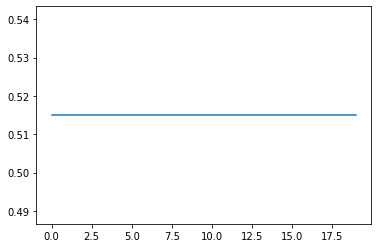

In [ ]:
import time 
from IPython.display import clear_output
topologia = [p, 4 , 10 ,4 , 1]
red = crear_red(topologia, activation,activation2)
loss = []

for i in range(500):
  pY,red = train(red, X, Y, coste, learning_rate=0.1)
  if i % 25 == 0:
    costo = coste(pY, Y)[0]
    print(f'Coste iteración {i}: {costo}')
    loss.append(costo)
    

    
plt.plot(range(len(loss)), loss)
plt.show()

In [ ]:
df=pd.read_csv("Input.csv")
df=df[500:700]
Y=pd.DataFrame(df["winner"])
Y.columns=[0]
Y[Y==1]=0
Y[Y==2]=1
X=df.drop(["winner","seasonId","creationTime","gameId"],axis=1)
X = (X-X.mean())/X.std()

In [ ]:
resultado = forward(red,X)
print(resultado[-1][1])
print(coste(resultado[-1][1], Y)[1])
print(coste(resultado[-1][1], Y)[0])

       0
500  0.0
501  0.0
502  0.0
503  0.0
504  0.0
..   ...
695  0.0
696  0.0
697  0.0
698  0.0
699  0.0

[200 rows x 1 columns]
       0
500  0.0
501 -1.0
502 -1.0
503  0.0
504  0.0
..   ...
695 -1.0
696 -1.0
697 -1.0
698 -1.0
699 -1.0

[200 rows x 1 columns]
0    0.515
dtype: float64


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, multilabel_confusion_matrix, precision_score
Y_pred = forward(red,X)[-1][1]
Y_pred[Y_pred<=0.5]=0
Y_pred[Y_pred>0.5]=1
Y_exp = Y
print(accuracy_score(Y_exp, Y_pred))
print(classification_report(Y_exp, Y_pred))

0.485
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        97
           1       0.00      0.00      0.00       103

    accuracy                           0.48       200
   macro avg       0.24      0.50      0.33       200
weighted avg       0.24      0.48      0.32       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
